# 퍼셉트론 구현하기
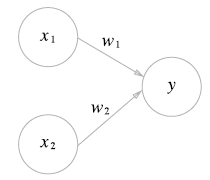

### AND 게이트 

In [5]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [6]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


### 가중치와 편향 도입
![[식 2.2]](https://t1.daumcdn.net/cfile/tistory/99B057465A65F39704 "[식 2.2]")

In [7]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7

np.sum(w*x) + b

-0.19999999999999996

### 가중치와 편향 구현

w1, w2(가중치)는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수<br>
b(편향)는 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수

ex) 
<br>b = -0.1 이면 np.sum(w\*x)가 0.1보다만 크면 뉴런이 활성화<br>
b = -20.0 이면 np.sum(w\*x)가 20.0을 넘어야 뉴런이 활성화

In [8]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [9]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [10]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [11]:
print(NAND(0,0))
print(NAND(1,0))
print(NAND(0,1))
print(NAND(1,1))

1
1
1
0


In [12]:
print(OR(0,0))
print(OR(1,0))
print(OR(0,1))
print(OR(1,1))

0
1
1
1


## 퍼셉트론의 한계
퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있음


<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99F0D9455A66073E31"  width="400px" height="400px"></img>
위 그림(XOR 게이트)에서 하나의 직선으로 세모(출력이 1)와 동그라미(출력이 0)를 나눌 수 있을까?<BR>
불가능하다.</br>
우리는 곡선으로 나눌 수 있다.<br>
<img src="https://t1.daumcdn.net/cfile/tistory/998041435A66070228"  width="400px" height="400px"></img><br>
우리는 곡선의 영역을 **비선형** 영역<br>
직선 영역을 **선형** 영역이라고 한다.<br><br>
퍼셉트론으로는 XOR 게이트를 표현할 수 없다. 퍼셉트론으로 층을 쌓는 **다층 퍼셉트론**으로 XOR 게이트를 표현해보자

<img src="https://velog.velcdn.com/images%2Fcitizenyves%2Fpost%2F698e42f0-66da-4d87-aa5f-f292fb7ac5c4%2Fimage.png"  width="400px" height="400px"></img><br>
XOR 게이트는 위 사진과 같이 AND, NAND, OR 게이트를 조합해 구현할 수 있다.

### XOR 게이트 구현하기

In [13]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [14]:
print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


위에서 구현한 XOR을 퍼셉트론으로 나타내면 다음과 같다.<br>
<img src="https://images.velog.io/images/citizenyves/post/041d474a-9cd7-48e8-86d4-8f04cb5726b2/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-11-16%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2012.59.42.png"  width="400px" height="400px"></img><br>
위 사진과 같이 층이 여러 개인 퍼셉트론을 다층 퍼셉트론이라 한다.<br>
퍼셉트론은 층을 쌓아 더 다양한 것을 표현할 수 있다.

# 정리
- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.<br>
- 퍼셉트론에서는 '가중치'와 '편향'을 매개변수로 설정한다.<br>
- 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다.<br>
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.<br>
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.<br>
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 펴셉트론은 비선형 영역도 표현할 수 있다.<br>
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.